### Business Intelligence (WI-201)
### 2023 (Prof. Dr. Sebastian Fischer)

# Übungsblatt 1
## Lerneinheit 1 ("Datenbereitstellung und -Modellierung")

> *Durch die Bearbeitung dieses Übungsblattes werden die Lerninhalte der Lerneinheit 1 praktisch angewendet und gefestigt. Durch pünktliche Abgabe eines vollständigen Übungsblattes werden Punkte auf die Gesamtbewertung erzielt. Das Übungsblatt ist eine Individualleistung. Gleichzeitig darf mit maximal zwei weiteren Studierenden gemeinsam die eigene Lösung besprochen werden. Sollte eine Lösung Elemente von anderen Studierenden oder Quellen beinhalten, die nicht als solche gekennzeichnet wurden, wird das Übungsblatt für alle Beteiligten mit 0 Punkten bewertet.*

In [216]:
# Einmalige Installation von Bibliotheken
# (bleibt installiert auch nach Neustart von Jupyter)
# Zeilen auskommentieren (# am Anfang der folgenden Zeilen wegnehmen), um die Installationsbefehle auszuführen

# !pip install mysql
# !pip install mysql-connector-python
# !pip install pymysql
# !pip install SQLAlchemy
# !pip install ipython[all]

In [217]:
# Import Libs
#########################################
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import errorcode
from hilfsfunktionen import *
import pandas as pd
from IPython.display import display_html
import pymysql

## Aufgabe 1: Unterschied OLTP und OLAP

> Befülle Tabelle `df_Vergleich` mit den zur Auswahl stehenden Eigenschaften aus der Tabelle `df_Lösungsangebote`. Nutze dazu die Nummern der Eigenschaften von OLTP und OLAP Systemen und erstelle eine neue Tabelle `df_Vergleich_lsg`

In [218]:
df_Vergleich = pd.DataFrame.from_dict({
                'Eigenschaften': 
                                  ['Art der Abfragen',
                                   'Transaktionsdauer und -typ',
                                   'Abfragestruktur', 
                                   'Datenvolumen der Abfrage',
                                   'Datenmodell', 
                                   'Datenquellen', 
                                   'Dateneigenschaften',
                                   'Datenvolumen in Byte',
                                   'Zugriffe',
                                   'Anwendertyp',
                                   'Anwenderzahl',
                                   'Antwortzeit'],
                'OLTP (transaktionale Systeme)': 
                                  ['--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--'], 
                'OLAP (analytische Systeme)': 
                                  ['--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--', 
                                   '--']})

In [219]:
df_Vergleich

,Eigenschaften,OLTP (transaktionale Systeme),OLAP (analytische Systeme)
0,Art der Abfragen,--,--
1,Transaktionsdauer und -typ,--,--
2,Abfragestruktur,--,--
3,Datenvolumen der Abfrage,--,--
4,Datenmodell,--,--
5,Datenquellen,--,--
6,Dateneigenschaften,--,--
7,Datenvolumen in Byte,--,--
8,Zugriffe,--,--
9,Anwendertyp,--,--


In [220]:
df_Lösungsangebote = pd.DataFrame.from_dict({
                        'Lösungsangebote': 
                                  ['Sekunden bis Minuten',
                                   'analyseoptimiert',
                                   'sehr viele Anwender', 
                                   'komplex',
                                   'Megabyte-Gigabyte', 
                                   'viele Datensätze', 
                                   'Lesen, periodisches Hinzufügen',
                                   'Redundanzarm, normalisiert',
                                   'abgeleitet, konsolidiert, historisiert',
                                   'Wenige Anwender',
                                   'Bereichszugriffe',
                                   'wenige Datensätze', 
                                   'lange Lesevorgänge', 
                                   'Terabyte - Petabyte', 
                                   'meist eine', 
                                   'Sachbearbeiter', 
                                   'Lesen, schreiben, ändern, löschen', 
                                   'kurze Lese-/Schreibvorgänge', 
                                   'einzelne Tupel auswerten/ändern', 
                                   'Millisekunden bis Sekunden', 
                                   'Manager, Controller, Analysten', 
                                   'nicht abgeleitet, zeitaktuell, autonom', 
                                   'einfach', 
                                   'meist mehrere']})

In [221]:
display_side_by_side(df_Lösungsangebote.iloc[0:8], df_Lösungsangebote.iloc[8:16], df_Lösungsangebote.iloc[16:24])

,Lösungsangebote
0,Sekunden bis Minuten
1,analyseoptimiert
2,sehr viele Anwender
3,komplex
4,Megabyte-Gigabyte
5,viele Datensätze
6,"Lesen, periodisches Hinzufügen"
7,"Redundanzarm, normalisiert"
,Lösungsangebote
8,"abgeleitet, konsolidiert, historisiert"


In [222]:
df_Vergleich_lsg = pd.DataFrame.from_dict({'Eigenschaften': 
                                  ['Art der Abfragen',
                                   'Transaktionsdauer und -typ',
                                   'Abfragestruktur', 
                                   'Datenvolumen der Abfrage',
                                   'Datenmodell', 
                                   'Datenquellen', 
                                   'Dateneigenschaften',
                                   'Datenvolumen in Byte',
                                   'Zugriffe',
                                   'Anwendertyp',
                                   'Anwenderzahl',
                                   'Antwortzeit'],
                'OLTP (transaktionale Systeme)': 
                                  ['Zahl aus df_Lösungsangebote', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...'], 
                'OLAP (analytische Systeme)': 
                                  ['...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...', 
                                   '...']})

In [223]:
df_Vergleich_lsg

,Eigenschaften,OLTP (transaktionale Systeme),OLAP (analytische Systeme)
0,Art der Abfragen,Zahl aus df_Lösungsangebote,...
1,Transaktionsdauer und -typ,...,...
2,Abfragestruktur,...,...
3,Datenvolumen der Abfrage,...,...
4,Datenmodell,...,...
5,Datenquellen,...,...
6,Dateneigenschaften,...,...
7,Datenvolumen in Byte,...,...
8,Zugriffe,...,...
9,Anwendertyp,...,...


In [224]:
# Lösung Aufgabe 1
oltp = [
    'Lesen, schreiben, ändern, löschen',             
    'kurze Lese-/Schreibvorgänge',
    'einfach',
    'wenige Datensätze',
    'Redundanzarm, normalisiert',
    'meist eine',
    'nicht abgeleitet, zeitaktuell, autonom',
    'Megabyte-Gigabyte',
    'einzelne Tupel auswerten/ändern',
    'Sachbearbeiter',
    'sehr viele Anwender',
    'Millisekunden bis Sekunden'
]
olap = [  
    'Lesen, periodisches Hinzufügen',
    'lange Lesevorgänge',
    'komplex',
    'viele Datensätze',
    'analyseoptimiert',
    'meist mehrere',
    'abgeleitet, konsolidiert, historisiert',
    'Terabyte - Petabyte',
    'Bereichszugriffe',
    'Manager, Controller, Analysten',
    'Wenige Anwender',
    'Sekunden bis Minuten'
]

def get_index(oltp_or_olap):
    data = []
    loesungsangebote = list(df_Lösungsangebote['Lösungsangebote'])
    for eigenschaft in oltp_or_olap:
        i = loesungsangebote.index(eigenschaft)
        data.append(i)
    return data

# ein dict und die funktion map() zu nutzen wäre besser wenn ich (nicht) wüsste
# ob bzw. dass noch weitere keys/rows außer der von mir abgefragten in dem df sind
df_Vergleich['Eigenschaften'] = df_Vergleich['Eigenschaften']
df_Vergleich['OLTP (transaktionale Systeme)'] = get_index(oltp)
df_Vergleich['OLAP (analytische Systeme)'] = get_index(olap)
df_Vergleich


,Eigenschaften,OLTP (transaktionale Systeme),OLAP (analytische Systeme)
0,Art der Abfragen,16,6
1,Transaktionsdauer und -typ,17,12
2,Abfragestruktur,22,3
3,Datenvolumen der Abfrage,11,5
4,Datenmodell,7,1
5,Datenquellen,14,23
6,Dateneigenschaften,21,8
7,Datenvolumen in Byte,4,13
8,Zugriffe,18,10
9,Anwendertyp,15,20


## Aufgabe 2: ETL (von OLTP zu OLAP)
> Dieser Aufgabe liegt eine Datenbank des Handelsunternehmens PC-Power Markt zu Grunde. Das Unternehmen hat eine Datenbank im Einsatz, mit Hilfe derer die Verkäufe von verschiedenen Filialen verwaltet werden. Nun möchte PC-Power Markt ein OLAP orientiertes Reporting aufbauen - wir werden dies für das Unternehmen in Grundzügen umsetzen. 
>
> Dazu gehen wir folgendermaßen vor:
>   1. Wir haben einen Datenbankabzug als .sql Datei bekommen. Mit dieser Datei werden wir auf unserem lokalen MySQL Server die Datenbank von PC-Power Markt nachbilden.
> 2. Als nächstes ziehen wir die Daten aus dem Datenband von PC-Power Markt in unser Jupyter Notebook und ergänzen sie um weitere Informationen aus externen Datenquellen
> 3. Danach werden wir aus dem ursprünglichen Datenbankschema ein Star Schema entwerfen, in SQL via Python implementieren und mit Daten befüllen
> 4. Abschließend werden wir eine Business-relevante Fragestellung als SQL-Abfrage formulieren und an die neue OLAP orientierte Datenbank (die im Star Schema vorliegt) auf unserem lokalen MySQL Server senden und das Ergebnis in einem Pandas DataFrame speichern.

### Verbindung zum lokalen MySQL Server herstellen und Datenbank erstellen

In [225]:
""" 
HINWEIS: 
Bitte MySQL Community Server und Workbench vorab installieren.
Während der Installation von MySQL Server muss ein Passwort für den Benutzer root vergeben werden (dieses bitte merken).
Entweder arbeitet ihr mit diesem root Nutzer und dem entsprechenden Passwort, oder ihr 
erstellt euch einen neuen Nutzer. In beiden fällen bitte Nutzer/Passwort hier eingeben:
"""
mysql_usr = "Katherine" # mit eurem Nutzer ersetzen
mysql_pw = "root" # mit eurem Passwort ersetzen

In [226]:
# Stellt sicher, dass der lokale MySQL Server gestartet wurde

connection = create_server_connection("localhost", mysql_usr, mysql_pw)

# Die Datenbank, in die wir den SQL Abzug vom Unternehmen PC-Power Markt einpflegen nennen wir "OLTP_DB"

# Falls bereits eine Datenbank namens "OLTP_DB" existiert, wird sie mit diesem Befehl gelöscht:
create_database_query = "DROP DATABASE IF EXISTS OLTP_DB;"
create_database(connection, create_database_query)

# Erstellen der Datenbank "OLTP_DB"
create_database_query = "CREATE DATABASE OLTP_DB;"
create_database(connection, create_database_query)


db_connection_str = 'mysql+pymysql://' + mysql_usr + ':' + mysql_pw + '@localhost/OLTP_DB'
db_connection = create_engine(db_connection_str)

MySQL Database connection successful
Database created successfully
Database created successfully


In [227]:
# Euch wurde der Datenbankabzug von PC-Power Markt in einer SQL Datei namens 
# OLTP_DB_schema+data.sql zur Verfügung gestellt. 
# Nun wird diese Datei geladen und auf der neu erstellen Datenbank "OLTP_DB" ausgeführt
file = open("data/db/OLTP_DB_schema+data.sql", 'r', encoding="utf-8")
oltp_db_sql_script_string = file.read()
file.close()
connection = create_db_connection("localhost", mysql_usr, mysql_pw, "OLTP_DB")
execute_query(connection, oltp_db_sql_script_string) 

MySQL Database connection successful
Query successful


In [228]:
db_connection_str = 'mysql+pymysql://' + mysql_usr + ':' + mysql_pw + '@localhost/OLTP_DB'
db_connection = create_engine(db_connection_str)

In [229]:
connection = create_db_connection("localhost", mysql_usr, mysql_pw, "OLTP_DB")
execute_query(connection, "Show Tables") 

MySQL Database connection successful
result: [('filialestamm',), ('kampagnenbeteiligung',), ('kampagnenergebnis',), ('kampagnenplan',), ('kampagnenstamm',), ('land',), ('produktstamm',), ('produktverkaufspreise',), ('regionstamm',), ('verkaufszahlen',), ('vertriebsplan',)]
Query successful


### OLTP Datenbankschema (mittels "reverse engineer" Funktion von MySQL Workbench nachvollziehen)

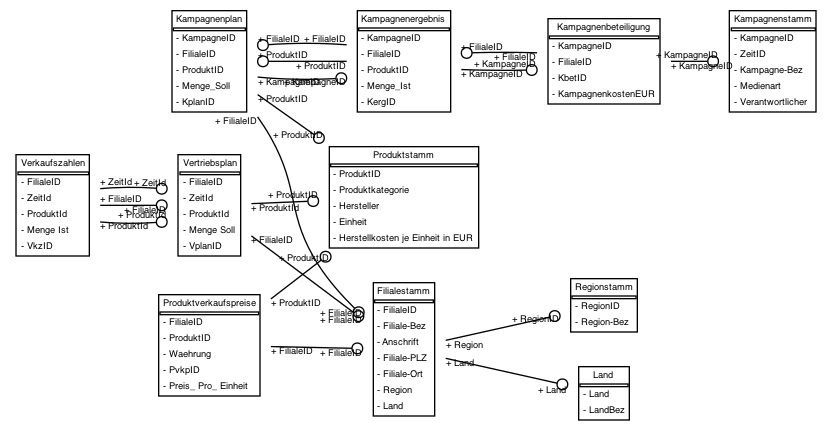

In [230]:
from IPython.display import Image
Image(filename='data/oltp_db_schema.png') 

### Ergebnis einer SQL Abfrage in ein Pandas Dataframe überführen

In [231]:
df_Filialestamm = pd.read_sql('SELECT * FROM Filialestamm', con=connection)
#ausgabe der ersten belibiege zahl z.B. 10 einträge in tabelle bzw. df filialestamm
df_Filialestamm.head()

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\2576031757.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Filialestamm = pd.read_sql('SELECT * FROM Filialestamm', con=connection)


,FilialeID,Filiale-Bez,Anschrift,Filiale-PLZ,Filiale-Ort,Region,Land
0,1,Global Computer Suppliers-Buenos Aires,Ing. Gustavo Moncada 8585,1010,Buenos Aires,SA,AR
1,2,Global Computer Suppliers-Graz,Kirchgasse 6,8010,Graz,EU,AT
2,3,Global Computer Suppliers-Salzburg,Geislweg 14,5020,Salzburg,EU,AT
3,4,Global Computer Suppliers-Bruxelles,Rue Joseph-Bens 532,B-1180,Bruxelles,EU,BE
4,5,Global Computer Suppliers-Charleroi,"Boulevard Tirou, 255",B-6000,Charleroi,EU,BE


### Modellierung eines Star Schemas auf Basis der OLTP Datenbank
> Aus dem gegebenen OLTP Schema können wir folgendes Star-Schema ableiten. Im weiteren Verlauf werden wir es um weitere Informationen ergänzen. Zur Erinnerung: das Star-Schema ordnet Informationen aus der OLTP orientierten Datenbank in Fakten- und Dimensionstabellen neu an.

In [232]:
# Star Schema:
'''
####################################
PK = Primary Key (Primärschlüssel)
FK = Foreign Key (Fremdschlüssel)
####################################

########Dimensionstabellen:#########

Werbekampagnenstammdaten: 
        WerbekampagneID (PK), 
        Bezeichnung, 
        Medienart, 
        Verantwortlicher 
        
Produktstammdaten: 
        ProduktID (PK), 
        Produktkategorie, 
        Hersteller, 
        Einheit, 
        Herstellkosten je Einheit in EUR

Zeitdimension: 
        ZeitID (PK), 
        KalMonatJahr, 
        Monat, 
        Jahr
        
Standortestammdaten: 
        FillialeID (PK), 
        FillialeBez,  
        Anschrift, 
        Filliale-PLZ, 
        Filliale-Ort, 
        Region, 
        RegionBez, 
        Land, 
        LandBez

##########Faktentabelle:#############

Faktentabelle_Marketing_Vertrieb: 
        ID (PK), 
        FillialeID (FK von Dimensionstabelle Standortestammdaten), 
        ZeitID (FK von Dimensionstabelle Zeitdimension), 
        WerbekampagneID (FK von Dimensionstabelle Werbekampagnenstammdaten),
        ProduktID (FK von Dimensionstabelle Produktstammdaten),
        Menge Ist,
        Menge Soll, 
        Preis_ Pro_ Einheit, 
        Waehrung,
        Herstellkosten je Einheit in EUR, (löschen wir später aus der Faktentabelle)
        Kampagnenkosten

'''

'\n####################################\nPK = Primary Key (Primärschlüssel)\nFK = Foreign Key (Fremdschlüssel)\n####################################\n\n########Dimensionstabellen:#########\n\nWerbekampagnenstammdaten: \n        WerbekampagneID (PK), \n        Bezeichnung, \n        Medienart, \n        Verantwortlicher \n        \nProduktstammdaten: \n        ProduktID (PK), \n        Produktkategorie, \n        Hersteller, \n        Einheit, \n        Herstellkosten je Einheit in EUR\n\nZeitdimension: \n        ZeitID (PK), \n        KalMonatJahr, \n        Monat, \n        Jahr\n        \nStandortestammdaten: \n        FillialeID (PK), \n        FillialeBez,  \n        Anschrift, \n        Filliale-PLZ, \n        Filliale-Ort, \n        Region, \n        RegionBez, \n        Land, \n        LandBez\n\n##########Faktentabelle:#############\n\nFaktentabelle_Marketing_Vertrieb: \n        ID (PK), \n        FillialeID (FK von Dimensionstabelle Standortestammdaten), \n        ZeitID (FK v

### Die einzelnen Dimensions- und Faktentabelle(n) mit SQL aus der OLTP Datenbank ziehen
# 2.1:

In [233]:
"""
Standortestammdaten: 
        FillialeID (PK), 
        FillialeBez, 
        Anschrift, 
        Filliale-PLZ, 
        Filliale-Ort, 
        Region, 
        RegionBez, 
        Land, 
        LandBez
"""
query = '''
        SELECT
                f.FilialeID,
                f.`Filiale-Bez`,
                f.`Anschrift`,
                f.`Filiale-PLZ`,
                f.`Filiale-Ort`,
                f.Region,
                r.`Region-Bez`,
                f.Land,
                l.LandBez
        FROM Filialestamm f
        INNER JOIN Regionstamm r
        ON f.Region = r.RegionID
        NATURAL JOIN Land l;

'''
df_Standortestammdaten = pd.read_sql(query, con=connection)
df_Standortestammdaten.set_index("FilialeID", inplace=True)
df_Standortestammdaten.head()

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\309168861.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Standortestammdaten = pd.read_sql(query, con=connection)


,Filiale-Bez,Anschrift,Filiale-PLZ,Filiale-Ort,Region,Region-Bez,Land,LandBez
FilialeID,,,,,,,,
1,Global Computer Suppliers-Buenos Aires,Ing. Gustavo Moncada 8585,1010,Buenos Aires,SA,Südamerika,AR,Argentinien
2,Global Computer Suppliers-Graz,Kirchgasse 6,8010,Graz,EU,Europa,AT,Österreich
3,Global Computer Suppliers-Salzburg,Geislweg 14,5020,Salzburg,EU,Europa,AT,Österreich
4,Global Computer Suppliers-Bruxelles,Rue Joseph-Bens 532,B-1180,Bruxelles,EU,Europa,BE,Belgien
5,Global Computer Suppliers-Charleroi,"Boulevard Tirou, 255",B-6000,Charleroi,EU,Europa,BE,Belgien


# 2.2: 
### PC-Power Markt hat uns aus einem weiteren Quellsystem die Informationen bereitgestellt, welche Filliale von welchem Verkaufsleiter betreut wird. Wir wollen die Dimensionstabelle "Standortestammdaten" entsprechend anreichern

In [234]:
# Verkaufsleiter aus weiterer externer Quelle laden
df_verkaufsleiter = pd.read_csv(
    "data/db/verkaufsleiter.csv",
    sep=",", index_col=0,
    dtype={'Verkaufsleiter': 'string'}
    )
df_verkaufsleiter.head()

,Verkaufsleiter
FilialeID,
1,Yvonne Moncada
2,Roland Mendel
3,Georg Pipps
4,Catherine Dewey
5,Pascale Cartrain


In [235]:
# Verkaufsleiter als neue Spalte in df_Standortestammdaten hinzufügen
df_Standortestammdaten =  df_Standortestammdaten.join(df_verkaufsleiter)
df_Standortestammdaten.head()

,Filiale-Bez,Anschrift,Filiale-PLZ,Filiale-Ort,Region,Region-Bez,Land,LandBez,Verkaufsleiter
FilialeID,,,,,,,,,
1,Global Computer Suppliers-Buenos Aires,Ing. Gustavo Moncada 8585,1010,Buenos Aires,SA,Südamerika,AR,Argentinien,Yvonne Moncada
2,Global Computer Suppliers-Graz,Kirchgasse 6,8010,Graz,EU,Europa,AT,Österreich,Roland Mendel
3,Global Computer Suppliers-Salzburg,Geislweg 14,5020,Salzburg,EU,Europa,AT,Österreich,Georg Pipps
4,Global Computer Suppliers-Bruxelles,Rue Joseph-Bens 532,B-1180,Bruxelles,EU,Europa,BE,Belgien,Catherine Dewey
5,Global Computer Suppliers-Charleroi,"Boulevard Tirou, 255",B-6000,Charleroi,EU,Europa,BE,Belgien,Pascale Cartrain


# 2.3:

In [236]:
#hohe übereinstimmtung mit inspirationsdatei
"""
Werbekampagnenstammdaten: 
        WerbekampagneID (PK), 
        Bezeichnung, 
        Medienart, 
        Verantwortlicher 
"""
query = '''
        SELECT KampagneID,`Kampagne-Bez`, Medienart, Verantwortlicher
        FROM kampagnenstamm'''
df_Werbekampagnenstammdaten = pd.read_sql(query, con=connection)
df_Werbekampagnenstammdaten.set_index("KampagneID", inplace=True)
df_Werbekampagnenstammdaten

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\3886260427.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Werbekampagnenstammdaten = pd.read_sql(query, con=connection)


,Kampagne-Bez,Medienart,Verantwortlicher
KampagneID,,,
1,Cebit 2003,Product Attachment,Shona Grimm
2,Tablet PC,Web mails,Sarah Hicks
3,HP,Radio,Robert Difatta
4,Desktop Nord Europa,Zeitungsbeilage,Marilyn Schaidt


# 2.4: 

In [237]:
#hohe übereinstimmtung mit inspirationsdatei
"""
Produktstammdaten: 
        ProduktID (PK), 
        Produktkategorie, 
        Hersteller, 
        Einheit, 
        Herstellkosten je Einheit in EUR
"""
query = '''
        SELECT ProduktID, Produktkategorie, Hersteller, Einheit, `Herstellkosten je Einheit in EUR`
        FROM Produktstamm'''
df_Produktstamm = pd.read_sql(query, con=connection)
df_Produktstamm.set_index("ProduktID", inplace=True)
df_Produktstamm.head()

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\1847511256.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Produktstamm = pd.read_sql(query, con=connection)


,Produktkategorie,Hersteller,Einheit,Herstellkosten je Einheit in EUR
ProduktID,,,,
1,Tablet PC,Acer,ST,1189
2,Notebook,Acer,ST,851
3,Notebook,Acer,ST,1679
4,Notebook,Acer,ST,781
5,Notebook,Acer,ST,977


# 2.5:
### PC-Power Markt hat uns aus einem weiteren Quellsystem Informationen zu den Produkten bereitgestellt. Wir wollen die Dimensionstabelle "Produktstamm" entsprechend anreichern

In [238]:
# Detaillierte Produktbeschreibungen aus externer Quelle Laden
df_produktbeschreibungen = pd.read_csv(
    "data/db/produktbeschreibungen.csv",
    sep=",",
    index_col=0,
    dtype={'Kurztext': 'string', 'Langtext': 'string'}
    )
# Kurztext und Langtext als neue Spalten in die Tabelle df_Produktstamm aus der Tabelle df_produktbeschreibungen übernehmen
df_Produktstamm = df_Produktstamm.join(df_produktbeschreibungen)
df_Produktstamm.head()

,Produktkategorie,Hersteller,Einheit,Herstellkosten je Einheit in EUR,Kurztext,Langtext
ProduktID,,,,,,
1,Tablet PC,Acer,ST,1189,Acer TM C104TCi Tablet PC,900-MHz PIII-M 256 MB RAM 40 GB Hard Drive
2,Notebook,Acer,ST,851,Acer TravelMate 233XV Notebook,20-GHz Celeron-M 256 MB RAM 30 GB Hard Drive D...
3,Notebook,Acer,ST,1679,Acer TravelMate 281XV Notebook,180-GHz Pentium 4-M 256 MB RAM 30 GB Hard Driv...
4,Notebook,Acer,ST,781,Acer TravelMate TM233XVi Notebook PC,20-GHz Celeron-M 256 MB RAM 30 GB Hard Drive
5,Notebook,Acer,ST,977,Acer TravelMate TM234LCi Notebook PC,22-GHz Celeron-M 512 MB RAM 40 GB Hard Drive


# 2.6: 

In [239]:
#hohe übereinstimmtung mit inspirationsdatei
"""
Zeitdimension: 
        ZeitID (PK), 
        KalMonatJahr, 
        Monat, 
        Jahr
"""
query = '''
          SELECT DISTINCT ZeitID
          FROM Verkaufszahlen 
          '''
df_Zeitdimension = pd.read_sql(query, con=connection)
df_Zeitdimension.drop_duplicates(inplace=True)

df_Zeitdimension['KalMonatJahr'] = pd.to_datetime(df_Zeitdimension['ZeitID'], format='%Y%m')
df_Zeitdimension['Jahr'] = df_Zeitdimension["KalMonatJahr"].dt.strftime('%Y')
df_Zeitdimension['Monat'] = df_Zeitdimension["KalMonatJahr"].dt.strftime('%m')
d = {'01':'Januar', 
     '02':'Februar',
     '03':'März',
     '04':'April',
     '05':'Mai',
     '06': 'Juni',
     '07': 'Juli', 
     '08': 'August',
     '09': 'September',
     '10': 'Oktober',
     '11': 'November',
     '12': 'Dezember'}

df_Zeitdimension['Monat'] = df_Zeitdimension['Monat'].replace(d, regex=True)
df_Zeitdimension.set_index("ZeitID", inplace=True)
df_Zeitdimension.head()

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\2850892340.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Zeitdimension = pd.read_sql(query, con=connection)


,KalMonatJahr,Jahr,Monat
ZeitID,,,
200301,2003-01-01,2003,Januar
200302,2003-02-01,2003,Februar
200303,2003-03-01,2003,März
200304,2003-04-01,2003,April
200305,2003-05-01,2003,Mai


# 2.7: 

In [240]:
#hohe übereinstimmtung mit inspirationsdatei
query_fact_table = '''
SELECT DISTINCT Filialestamm.FilialeID, Vertriebsplan.ZeitID, Produktstamm.ProduktID,
  KampagneID, Verkaufszahlen.`Menge Ist`, Vertriebsplan.`Menge Soll`, `Preis_ Pro_ Einheit`,
  Waehrung, `Herstellkosten je Einheit in EUR`, KampagnenkostenEUR
FROM Filialestamm

INNER JOIN Produktverkaufspreise 
	ON Filialestamm.FilialeID = Produktverkaufspreise.FilialeID
INNER JOIN Produktstamm
	ON Produktverkaufspreise.ProduktID = Produktstamm.ProduktID
INNER JOIN Vertriebsplan 
	ON Filialestamm.FilialeID = Vertriebsplan.FilialeID
    AND Produktstamm.ProduktID = Vertriebsplan.ProduktID
INNER JOIN Verkaufszahlen 
	ON Vertriebsplan.ZeitID = Verkaufszahlen.ZeitID
    AND Vertriebsplan.FilialeID = Verkaufszahlen.FilialeID
    AND Vertriebsplan.ProduktID = Verkaufszahlen.ProduktID

LEFT JOIN (
    SELECT Kampagnenplan.FilialeID, Kampagnenplan.ProduktID, Kampagnenergebnis.KampagneID,
    KampagnenkostenEUR
FROM Kampagnenplan

INNER JOIN Kampagnenergebnis 
	ON Kampagnenplan.FilialeID = Kampagnenergebnis.FilialeID
    AND Kampagnenplan.ProduktID = Kampagnenergebnis.ProduktID
    AND Kampagnenplan.KampagneID = Kampagnenergebnis.KampagneID

INNER JOIN Kampagnenbeteiligung
	ON Kampagnenergebnis.FilialeID = Kampagnenbeteiligung.FilialeID
    AND Kampagnenergebnis.KampagneID = Kampagnenbeteiligung.KampagneID
)

AS Kampagne
	ON Filialestamm.FilialeID = Kampagne.FilialeID
    AND Produktstamm.ProduktID = Kampagne.ProduktID
'''

# Hinweis: dieser String wird in der nächsten Zelle im pd.read_sql Befehl verwendet. 
# Der SQL-Befehl ist hier der Übersicht halber ausgelagert, da er deutlich umfangreicher
# sein wird, als die bisher entwickelten


In [241]:
"""
Faktentabelle_Marketing_Vertrieb: 
        ID (PK), 
        FillialeID (FK), 
        ZeitID (FK), 
        WerbekampagneID (FK),
        ProduktID (FK),
        Menge Ist,
        Menge Soll,
        Preis Pro Einheit, 
        Waehrung,
        Herstellkosten je Einheit in EUR,
        Kampagnenkosten

"""
df_Faktentabelle_Marketing_Vertrieb = pd.read_sql(query_fact_table, con=connection)
df_Faktentabelle_Marketing_Vertrieb.head()


C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\1299025498.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_Faktentabelle_Marketing_Vertrieb = pd.read_sql(query_fact_table, con=connection)


,FilialeID,ZeitID,ProduktID,KampagneID,Menge Ist,Menge Soll,Preis_ Pro_ Einheit,Waehrung,Herstellkosten je Einheit in EUR,KampagnenkostenEUR
0,8,200303,66,NaN,160,141,390.35,CAD,139,NaN
1,8,200303,72,NaN,181,197,480.14,CAD,174,NaN
2,8,200303,80,3.0,152,151,664.28,CAD,314,13798.0
3,8,200303,90,NaN,155,159,613.79,CAD,315,NaN
4,8,200304,1,2.0,121,115,2201.70,CAD,1189,53236.0


# 2.8:

In [242]:
"""
############################################################
Wir müssen weitere Spalten in die Faktentabelle aufnehmen ##
Folgende Spalten sind zu berechnen:                       ##
############################################################
Umsatz Ist = Menge Ist * Preis_ Pro_ Einheit
Umsatz Soll = Menge Soll * Preis_ Pro_ Einheit
Herstellkosten = Menge Ist * Herstellkosten je Einheit in EUR
Gewinn = Umsatz Ist - Herstellkosten

"""
def berechne_column(df, column1, column2, subtraction=False):
    if subtraction:
        result_column = df[column1] - df[column2]
        return result_column
    result_column = df[column1] * df[column2]
    return result_column


df_Faktentabelle_Marketing_Vertrieb["Umsatz_Ist"] = berechne_column(
    df_Faktentabelle_Marketing_Vertrieb, 'Menge Ist','Preis_ Pro_ Einheit'
    )
df_Faktentabelle_Marketing_Vertrieb["Umsatz_Soll"] = berechne_column(
    df_Faktentabelle_Marketing_Vertrieb, 'Menge Soll','Preis_ Pro_ Einheit'
    )
df_Faktentabelle_Marketing_Vertrieb["Herstellkosten"] = berechne_column(
    df_Faktentabelle_Marketing_Vertrieb, 'Menge Ist','Herstellkosten je Einheit in EUR'
    )
df_Faktentabelle_Marketing_Vertrieb["Gewinn"] = berechne_column(
    df_Faktentabelle_Marketing_Vertrieb,'Umsatz_Ist','Herstellkosten', subtraction=True
    )

df_Faktentabelle_Marketing_Vertrieb.drop(["Herstellkosten je Einheit in EUR"], axis=1, inplace=True)
df_Faktentabelle_Marketing_Vertrieb

,FilialeID,ZeitID,ProduktID,KampagneID,Menge Ist,Menge Soll,Preis_ Pro_ Einheit,Waehrung,KampagnenkostenEUR,Umsatz_Ist,Umsatz_Soll,Herstellkosten,Gewinn
0,8,200303,66,NaN,160,141,390.35,CAD,NaN,62456.00,55039.35,22240,40216.00
1,8,200303,72,NaN,181,197,480.14,CAD,NaN,86905.34,94587.58,31494,55411.34
2,8,200303,80,3.0,152,151,664.28,CAD,13798.0,100970.56,100306.28,47728,53242.56
3,8,200303,90,NaN,155,159,613.79,CAD,NaN,95137.45,97592.61,48825,46312.45
4,8,200304,1,2.0,121,115,2201.70,CAD,53236.0,266405.70,253195.50,143869,122536.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,35,200301,24,NaN,24,23,1453.86,USD,NaN,34892.64,33438.78,25200,9692.64
7568,35,200304,32,NaN,16,14,1833.33,USD,NaN,29333.28,25666.62,12320,17013.28
7569,35,200309,66,NaN,20,24,309.81,USD,NaN,6196.20,7435.44,2780,3416.20
7570,37,200307,50,3.0,26,22,789.06,USD,13798.0,20515.56,17359.32,10920,9595.56


In [243]:
df_Faktentabelle_Marketing_Vertrieb.index.name = 'ID'
df_Faktentabelle_Marketing_Vertrieb.head()

,FilialeID,ZeitID,ProduktID,KampagneID,Menge Ist,Menge Soll,Preis_ Pro_ Einheit,Waehrung,KampagnenkostenEUR,Umsatz_Ist,Umsatz_Soll,Herstellkosten,Gewinn
ID,,,,,,,,,,,,,
0,8,200303,66,NaN,160,141,390.35,CAD,NaN,62456.00,55039.35,22240,40216.00
1,8,200303,72,NaN,181,197,480.14,CAD,NaN,86905.34,94587.58,31494,55411.34
2,8,200303,80,3.0,152,151,664.28,CAD,13798.0,100970.56,100306.28,47728,53242.56
3,8,200303,90,NaN,155,159,613.79,CAD,NaN,95137.45,97592.61,48825,46312.45
4,8,200304,1,2.0,121,115,2201.70,CAD,53236.0,266405.70,253195.50,143869,122536.70


In [244]:
connection.close()

## Erstellen der neuen OLAP Datenbank auf dem MySQL Server

In [245]:
connection = create_server_connection("localhost", mysql_usr, mysql_pw)

# Falls schon eine OLAP_DB existiert, diese löschen:
create_database_query = "DROP DATABASE IF EXISTS OLAP_DB;"
create_database(connection, create_database_query)

# Erstellen der OLAP_DB
create_database_query = "CREATE DATABASE OLAP_DB;"
create_database(connection, create_database_query)


MySQL Database connection successful
Database created successfully
Database created successfully


In [246]:
#hohe übereinstimmtung mit inspirationsdatei
# Daten aus der DataFrame Dimensionstabellen und der Faktentabelle in die neue OLAP_DB laden
db_connection_str = 'mysql+pymysql://' + mysql_usr + ':' + mysql_pw + '@localhost:3306/OLAP_DB' # assuming default MySQL port is 3306
db_connection = create_engine(db_connection_str)

df_Faktentabelle_Marketing_Vertrieb.to_sql('faktentabelle_marketing_vertrieb', db_connection_str, if_exists='replace')
df_Zeitdimension.to_sql('zeitdimension', db_connection_str, if_exists='replace')
df_Produktstamm.to_sql('produktstamm', db_connection_str, if_exists='replace')
df_Werbekampagnenstammdaten.to_sql('werbekampagnenstammdaten', db_connection_str, if_exists='replace')
df_Standortestammdaten.to_sql('standortestammdaten', db_connection_str, if_exists='replace')

# Schlüsselbeziehungen zwischen den Tabellen erstellen
query_table_relations = """
USE `OLAP_DB`;
ALTER TABLE `faktentabelle_marketing_vertrieb` MODIFY `KampagneID` INTEGER;
ALTER TABLE `werbekampagnenstammdaten` MODIFY `KampagneID` INTEGER;

ALTER TABLE `faktentabelle_marketing_vertrieb` ADD CONSTRAINT `Faktentabelle_Marketing_Vertrieb_Zeit Id_fk` FOREIGN KEY (`ZeitID`) REFERENCES `Zeitdimension`(`ZeitID`);
ALTER TABLE `faktentabelle_marketing_vertrieb` ADD CONSTRAINT `Standortestammdaten Id_fk` FOREIGN KEY (`FilialeID`) REFERENCES `Standortestammdaten`(`FilialeID`);
ALTER TABLE `faktentabelle_marketing_vertrieb` ADD CONSTRAINT `Produktstamm Id_fk` FOREIGN KEY (`ProduktID`) REFERENCES `Produktstamm`(`ProduktID`);
ALTER TABLE `faktentabelle_marketing_vertrieb` ADD CONSTRAINT `Werbekampagnenstammdaten Id_fk` FOREIGN KEY (`KampagneID`) REFERENCES `Werbekampagnenstammdaten`(`KampagneID`);

"""
execute_query(connection, query_table_relations) 


Query successful


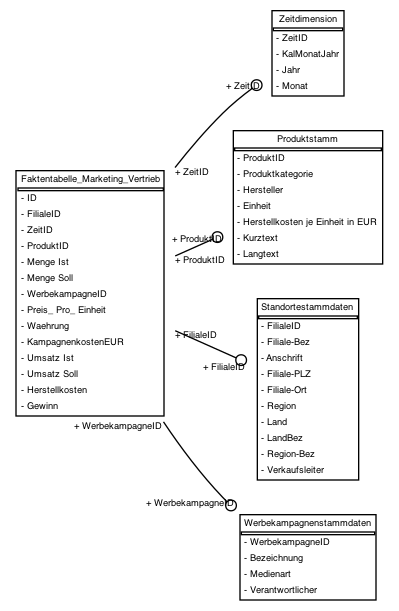

In [247]:
from IPython.display import Image
Image(filename='data/olap_db_schema.png') 

# 2.9: 
## Beispielhafte analyse direkt auf dem Star-Schema

>
>Geschäftsrelevante Fragestellung: Wie hoch ist der Ist- und Soll Umsatz in jedem Land insgesamt? Ordne die Ansicht nach der Landeswährung.

In [248]:
#hohe übereinstimmtung mit inspirationsdatei
query = '''
      SELECT
        Waehrung,
        LandBez,
        Umsatz_Ist,
        Umsatz_Soll
      FROM Faktentabelle_Marketing_Vertrieb
      NATURAL JOIN Standortestammdaten
'''

# Wie hoch ist der Ist- und Soll Umsatz in jedem Land insgesamt? Ordne die Ansicht nach der Landeswährung.
df_umsaetze_land_waehrung = pd.read_sql(query, con=connection)


C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\747321925.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_umsaetze_land_waehrung = pd.read_sql(query, con=connection)


In [249]:
df_umsaetze_land_waehrung = df_umsaetze_land_waehrung.groupby(["Waehrung", "LandBez"]).sum().round(1)
df_umsaetze_land_waehrung = df_umsaetze_land_waehrung.sort_values(["Waehrung", "LandBez"], ascending=[True, True])
df_umsaetze_land_waehrung

Umsatz_Ist  Umsatz_Soll
Waehrung LandBez                                 
CAD      Kanada           62781969.5   63277852.9
CHF      Schweiz          39048975.3   38695908.9
DKK      Dänemark        325200977.3  328575322.8
EUR      Belgien          20394028.5   20565187.1
         Deutschland     265841023.9  266301148.3
         Finnland         23106586.1   23077226.6
         Frankreich       21821336.6   21910183.7
         Irland           12813938.7   12912657.4
         Italien          18228291.0   18206736.1
         Spanien          30676048.2   30399151.5
         Österreich       35221093.8   35442797.1
GBP      Großbritannien   11301620.2   11341017.5
NOK      Norwegen         47821762.0   47554195.6
PLN      Polen            85469352.4   85670742.1
SEK      Schweden         98238074.2   97905560.1
USD      USA              28862592.4   28653558.5

# 2.10:

In [250]:
#hohe übereinstimmtung mit inspirationsdatei
# Neuer Gesamt Abzug aus Star Schema
query = '''
      SELECT *
      FROM faktentabelle_marketing_vertrieb
      NATURAL JOIN produktstamm
      NATURAL JOIN Standortestammdaten
      NATURAL JOIN werbekampagnenstammdaten
      NATURAL JOIN zeitdimension
      '''
df_star_flat = pd.read_sql(query, con=connection)

df_star_flat.set_index("ID", inplace=True)
df_star_flat = df_star_flat.loc[:,~df_star_flat.columns.duplicated()]
df_star_flat.fillna("0", inplace=True)

df_star_flat = df_star_flat.astype({"FilialeID":"int32",
                    "ZeitID":"int64",
                    "ProduktID":"int64",
                    "Menge Ist":"int64",
                    "Menge Soll":"int64",
                    "KampagneID":"float64",
                    "Preis_ Pro_ Einheit":"float64",
                    "Waehrung":"string",
                    "Herstellkosten je Einheit in EUR":"int64",
                    "KampagnenkostenEUR":"float64",
                    "Umsatz_Ist":"float64",
                    "Umsatz_Soll":"float64",
                    "Herstellkosten":"int64",
                    "Gewinn":"float64",
                    "FilialeID":"int32",
                    "Filiale-Bez":"string",
                    "Anschrift":"string",
                    "Filiale-PLZ":"string",
                    "Filiale-Ort":"string",
                    "Region":"string",
                    "Land":"string",
                    "LandBez":"string",
                    "Region-Bez":"string",
                    "Verkaufsleiter":"string",
                    "ZeitID":"int64",
                    "KalMonatJahr":"datetime64[ns]",
                    "Jahr":"int",
                    "Monat":"string",
                    "KampagneID":"int",
                    "Kampagne-Bez":"string",
                    "Medienart":"string",
                    "Verantwortlicher":"string",
                    "ProduktID":"int64",
                    "Produktkategorie":"string",
                    "Hersteller":"string",
                    "Einheit":"string",
                    "Kurztext":"string",
                    "Langtext":"string"
                 })

df_star_flat.head()

C:\Users\kuhle\AppData\Local\Temp\ipykernel_11108\3808639292.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_star_flat = pd.read_sql(query, con=connection)


,ZeitID,KampagneID,FilialeID,ProduktID,Menge Ist,Menge Soll,Preis_ Pro_ Einheit,Waehrung,KampagnenkostenEUR,Umsatz_Ist,...,Region-Bez,Land,LandBez,Verkaufsleiter,Kampagne-Bez,Medienart,Verantwortlicher,KalMonatJahr,Jahr,Monat
ID,,,,,,,,,,,,,,,,,,,,,
2,200303,3,8,80,152,151,664.28,CAD,13798.0,100970.56,...,Nordamerika,CA,Kanada,Jean Fresnière,HP,Radio,Robert Difatta,2003-03-01,2003,März
4,200304,2,8,1,121,115,2201.70,CAD,53236.0,266405.70,...,Nordamerika,CA,Kanada,Jean Fresnière,Tablet PC,Web mails,Sarah Hicks,2003-04-01,2003,April
8,200304,2,8,15,149,162,2553.94,CAD,53236.0,380537.06,...,Nordamerika,CA,Kanada,Jean Fresnière,Tablet PC,Web mails,Sarah Hicks,2003-04-01,2003,April
9,200304,3,8,17,150,150,2093.64,CAD,13798.0,314046.00,...,Nordamerika,CA,Kanada,Jean Fresnière,HP,Radio,Robert Difatta,2003-04-01,2003,April
13,200304,2,8,31,118,108,2686.73,CAD,53236.0,317034.14,...,Nordamerika,CA,Kanada,Jean Fresnière,Tablet PC,Web mails,Sarah Hicks,2003-04-01,2003,April


In [251]:
connection.close()

## Abschließend speichern wir alle Daten flat in eine CSV Datei

In [252]:
df_star_flat.to_csv("data/Aufgabe2_daten.csv", sep=";", decimal=",")

# Geschafft!
> Glückwunsch, du hast es geschafft! Du kannst jetzt mit Python Daten aus einer transaktionsorientierten Datenbank extrahieren, diese transformieren und anreichern und in ein OLAP orientiertes Star-Schema überführen. Dieser ETL Prozess ist im Wesentlichen der Gleiche, wie wenn man operative Daten aus verschiedenen Quellsystemen per ETL in ein Operational Data Store oder Data Warehouse bzw. Data Mart überführen würde. Im zweiten Übungsblatt werden wir mehr zum Themen Informationsgenerierung lernen.